# Introduction to Python for Earth Scientists

These notebooks have been developed by Calum Chamberlain, Finnigan Illsley-Kemp, John Townend and El Mestel at [Victoria University of Wellington-Te Herenga Waka](https://www.wgtn.ac.nz) for use by Earth Science graduate students. 

The notebooks cover material that we think will be of particular benefit to those students with little or no previous experience of computer-based data analysis. We presume very little background in command-line or code-based computing, and have compiled this material with an emphasis on general tasks that a grad student might encounter on a daily basis. 

In 2024, this material will be delivered at the start of Trimester 1 in conjunction with [ESCI451 Active Earth](https://www.wgtn.ac.nz/courses/esci/451). Space permitting, interested students not enrolled in ESCI451 are encouraged to come along too but please contact El, Calum, Finn, or John first.

| Notebook | Contents | Data |
| --- | --- | --- |
| [1A](ESCI451_Module_1A.ipynb) | Introduction to programming, Python, and Jupyter notebooks | - |
| [1B](ESCI451_Module_1B.ipynb) | Basic data types and variables, getting data, and plotting with Matplotlib | Geodetic positions |
| [2A](ESCI451_Module_2A.ipynb) | More complex plotting, introduction to Numpy | Geodetic positions; DFDP-2B temperatures |
| [2B](ESCI451_Module_2B.ipynb) | Using Pandas to load, peruse and plot data | Earthquake catalogue  |
| **[3A](ESCI451_Module_3A.ipynb)** | **Working with Pandas dataframes** | **Geochemical data set; GNSS data** |
| [3B](ESCI451_Module_3B.ipynb) | Simple time series analysis using Pandas | Historical temperature records |
| [4A](ESCI451_Module_4A.ipynb) | Making maps with PyGMT | Earthquake catalogue |
| [4B](ESCI451_Module_4B.ipynb) | Gridded data and vectors | Ashfall data and GNSS |
| [Scripting](ESCI451_Module_5A_Scripting.ipynb) | Moving from notebooks to scripts and the command line | - |

The content may change in response to students' questions or current events. Each of the four modules has been designed to take about three hours, with a short break between each of the two parts.

# This notebook

1. More with Pandas dataframes
   - Loading and summarising another dataset
   - Working with subplots
   - Regression
   - Dates and times and datetimes
   - Querying a dataframe using a function
   - Applying functions to a dataframe
2. Extension: more sophisticated analysis of a big dataset
   
 

## Loading and summarising another dataset

Let's recap where we got to with Pandas in the previous notebook. We learnt how to obtain data from GeoNet and store it in .csv (comma-separated variable) file and a Pandas dataframe, which we could then inspect and plot in various ways. 

We'll start this notebook by reviewing some of the ways in which we can inspect, describe and plot Pandas dataframes, and then focus on working with dates and times. The first step is to reload the necessary modules.

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import datetime
import numpy as np

%matplotlib widget

Let's load a geochemical data set obtained by a PhD student, Elliot Swallow, for volcanic rocks from Huckleberry Ridge.

In [2]:
geochem = pd.read_csv(
    "data/Edited Swallow et al J Petrol data for plotting.csv",
    index_col="Sample")
print(geochem)

        SiO2 (wt%)  TiO2 (wt%)  Al2O3 (wt%)  Fe2O3 (T) (wt%)  MnO (wt%)  \
Sample                                                                    
YP114        72.98        0.26        13.56             2.96       0.05   
YP307        76.50        0.13        11.85             1.70       0.04   
YP359        74.56        0.17        12.83             2.06       0.04   
YP363        76.61        0.12        12.06             1.73       0.04   
YP414        76.08        0.14        12.14             1.79       0.04   
...            ...         ...          ...              ...        ...   
YP564        76.64        0.17        12.23             2.13       0.02   
YP603        76.93        0.19        11.77             2.29       0.04   
YP081        75.68        0.10        12.81             1.84       0.04   
YP133        76.69        0.10        12.04             1.55       0.02   
YP600        76.39        0.10        12.54             1.59       0.03   

        MgO (wt%)  CaO (

Printing a dataframe out gives us a rough look at the data and we've seen before how we can compute various statistics to explore the dataframe piece by piece. But there's another way of getting a nicely-formatted, informative summary of the whole dataframe and that is to use the [`.describe()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) command:

In [3]:
geochem.describe()

,SiO2 (wt%),TiO2 (wt%),Al2O3 (wt%),Fe2O3 (T) (wt%),MnO (wt%),MgO (wt%),CaO (wt%),Na2O (wt%),K2O (wt%),P2O5 (wt%),...,Dy (ppm),Ho (ppm),Er (ppm),Tm (ppm),Yb (ppm),Lu (ppm),Hf (ppm),Pb (ppm),Th (ppm),U (ppm)
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,...,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,74.183231,0.332462,12.286308,3.753692,0.060615,0.125385,1.287692,3.251846,4.600769,0.071015,...,9.144615,1.793268,5.316615,0.735387,4.721538,0.780735,9.248016,31.741538,17.719730,4.264615
std,3.039516,0.272827,0.697152,2.692407,0.035745,0.103155,0.951845,0.369501,1.149364,0.096781,...,2.298507,0.458869,1.399712,0.195950,1.234845,0.212324,2.712692,9.352855,5.001809,0.990649
min,66.460000,0.100000,11.480000,1.320000,0.010000,-0.000000,0.330000,2.580000,2.040000,0.010000,...,3.200000,0.620000,1.880000,0.270000,1.800000,0.290000,6.000000,16.800000,7.700000,2.200000
25%,72.230000,0.140000,11.760000,1.840000,0.040000,0.050000,0.700000,2.950000,3.920000,0.020000,...,7.600000,1.500000,4.400000,0.610000,3.900000,0.640000,7.000000,26.000000,14.000000,3.800000
50%,75.060000,0.220000,12.000000,2.540000,0.050000,0.090000,1.030000,3.260000,4.960000,0.030000,...,9.600000,1.890000,5.700000,0.780000,5.000000,0.840000,8.300000,30.000000,17.900000,4.200000
75%,76.690000,0.390000,12.760000,4.570000,0.070000,0.190000,1.400000,3.480000,5.370000,0.070000,...,10.500000,2.100000,6.200000,0.840000,5.500000,0.920000,11.000000,36.000000,21.000000,4.700000
max,77.640000,1.120000,14.050000,10.680000,0.160000,0.470000,3.910000,4.180000,6.160000,0.390000,...,14.700000,3.000000,8.900000,1.290000,8.300000,1.200000,16.224530,80.000000,31.000000,7.500000


How cool is that?!

## Working with subplots

What we can immediately see is that this dataset contains a lot of geochemical parameters (38!) and if we want to discover how they relate to each other we're going to have to do some more plotting. Ideally, it would be interesting to plot each parameter against every other one but this will get pretty overwhelming so we'll focus on a few interesting ones.

To make our plots, we'll use the `plt.subplots()` syntax we've encountered previously, but which we haven't yet used to its full extent. As the name suggests, subplots let you make multiple plots in one. 

To start with, let's plot the first four major elements in the table ($TiO_2$, $Al_2O_3$, $Fe_2O_3 (T)$, $MnO$) against $Si0_2$.

To do this we will need four axes.  We can make four axes using the `plt.subplots` command.  Lets get help for that function.  You can get to the docs for a given function by typing `function?`.  Run the cell below and you should see a pop-up of the docs.




In [4]:
plt.subplots?

Signature:
plt.subplots(
    nrows: 'int' = 1,
    ncols: 'int' = 1,
    *,
    sharex: "bool | Literal['none', 'all', 'row', 'col']" = False,
    sharey: "bool | Literal['none', 'all', 'row', 'col']" = False,
    squeeze: 'bool' = True,
    width_ratios: 'Sequence[float] | None' = None,
    height_ratios: 'Sequence[float] | None' = None,
    subplot_kw: 'dict[str, Any] | None' = None,
    gridspec_kw: 'dict[str, Any] | None' = None,
    **fig_kw,
) -> 'tuple[Figure, Any]'
Docstring:
Create a figure and a set of subplots.

This utility wrapper makes it convenient to create common layouts of
subplots, including the enclosing figure object, in a single call.

Parameters
----------
nrows, ncols : int, default: 1
    Number of rows/columns of the subplot grid.

sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
    Controls sharing of properties among x (*sharex*) or y (*sharey*)
    axes:

    - True or 'all': x- or y-axis will be shared among all subplots.
    - False

The arguments that we care about at the moment at:
- `nrows`, the number of rows of subplots
- `ncols`, the number of columns of subplots
- `sharex`, whether axes should have the same x-axis.  We will be having $SiO_2$ on all the x-axes, so we will set this to be `True`.

Lets make a 2x2 grid of subplots:

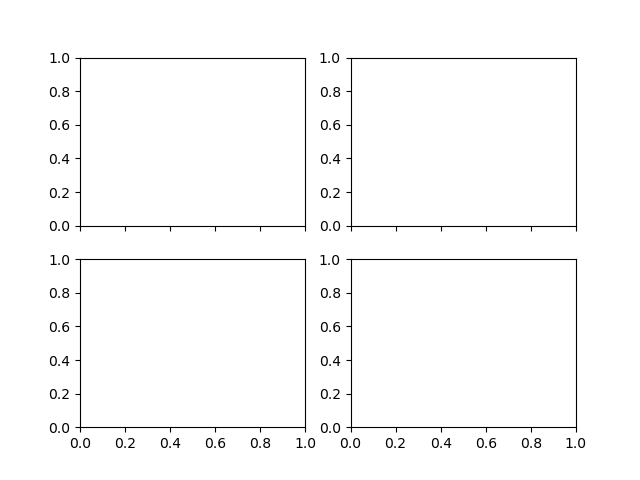

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True)

Note that we īncluded `sharex=True` in our command, which will ensure that all four panels have the same x-axis.

This returned two things as usual, `fig`: the `figure` containing all our axes, and `ax`, which is a list of the subplot axes.  We can specify which axes we want to use for each graph by remembering that Python counts from zero and noting that _the axes are indexed by row and then by column_.

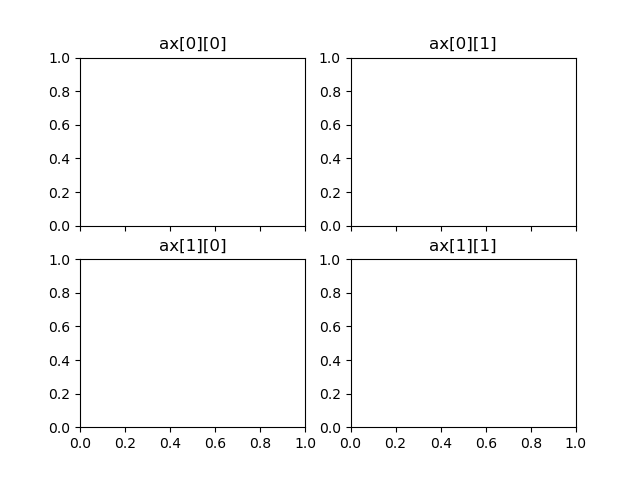

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True)
for column in range(2):
    for row in range(2):
        ax[row][column].set_title(f"ax[{row}][{column}]")

Right, let's plot actual data using two loops to run through the parameters and axes:

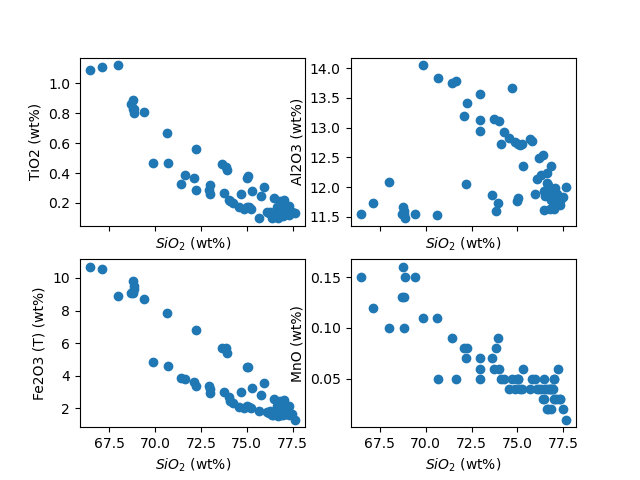

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True)

elements = [["TiO2 (wt%)", "Al2O3 (wt%)"], ["Fe2O3 (T) (wt%)", "MnO (wt%)"]]
for column in range(2):
    for row in range(2):
        element_name = elements[row][column]
        ax[row][column].scatter(geochem["SiO2 (wt%)"], geochem[element_name])
        ax[row][column].set_ylabel(element_name)
        ax[row][column].set_xlabel("$SiO_2$ (wt%)")

The y-axis labels are getting in the way a bit but we can easily avoid this as follows:

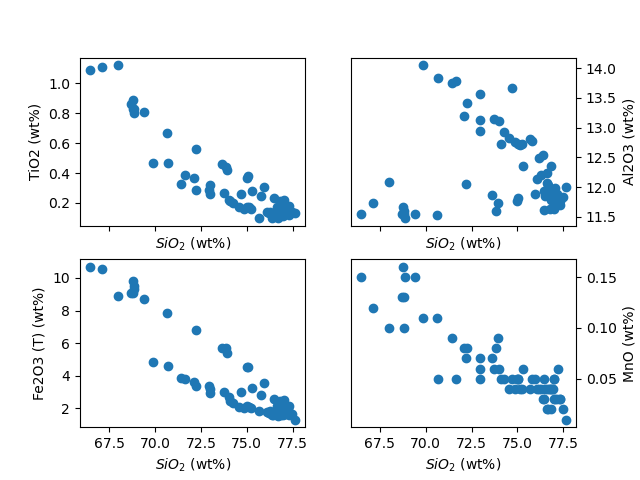

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True)

elements = [["TiO2 (wt%)", "Al2O3 (wt%)"], ["Fe2O3 (T) (wt%)", "MnO (wt%)"]]
for column in range(2):
    for row in range(2):
        element_name = elements[row][column]
        ax[row][column].scatter(geochem["SiO2 (wt%)"], geochem[element_name])
        ax[row][column].set_ylabel(element_name)
        ax[row][column].set_xlabel("$SiO_2$ (wt%)")
        if column == 1:
            ax[row][column].yaxis.tick_right()
            ax[row][column].yaxis.set_label_position("right")


Alternatively, we could use [`plt.tight_layout()`](https://matplotlib.org/stable/users/explain/axes/tight_layout_guide.html) to automatically adjust the subplot parameters to fit into the figure area (though this may not always work).

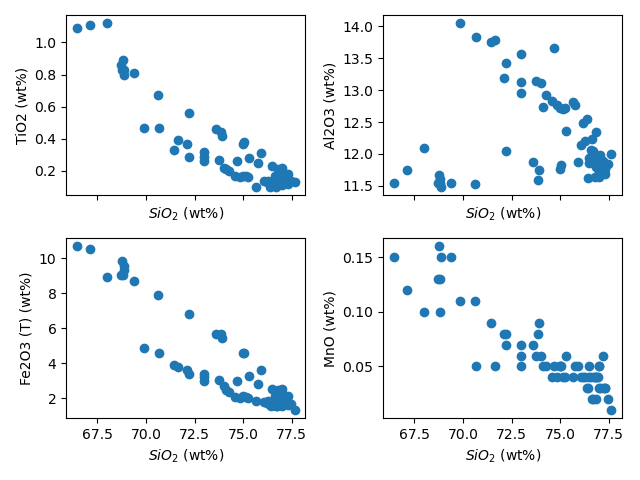

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True)

elements = [["TiO2 (wt%)", "Al2O3 (wt%)"], ["Fe2O3 (T) (wt%)", "MnO (wt%)"]]
for column in range(2):
    for row in range(2):
        element_name = elements[row][column]
        ax[row][column].scatter(geochem["SiO2 (wt%)"], geochem[element_name])
        ax[row][column].set_ylabel(element_name)
        ax[row][column].set_xlabel("$SiO_2$ (wt%)")

plt.tight_layout()

### Exercise:

Try writing some code to plot the four parameters of interest against $SiO_2$ in a 1x4 subplot layout with a common y-axis ($SiO_2$).

In [10]:
# Your answer here

## Regression

We can infer from the plots above that $Fe_2O_3$ and $TiO_2$ exhibit very similar behaviour with regard to $SiO_2$. Sure enough, we find when we plot one against the other that they have are highly correlated:

<Axes: xlabel='Fe2O3 (T) (wt%)', ylabel='TiO2 (wt%)'>

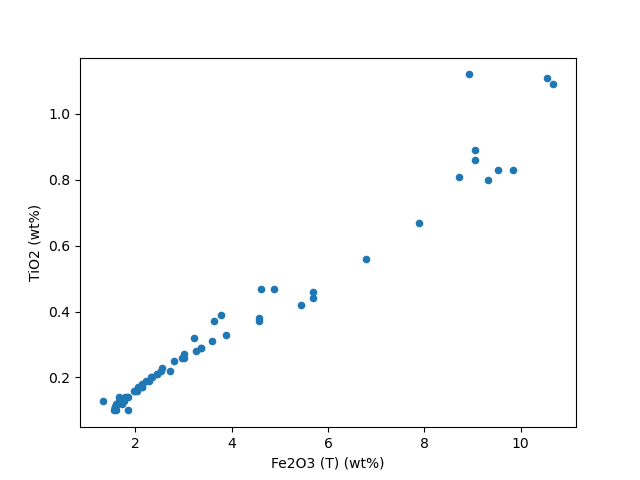

In [11]:
geochem.plot(x="Fe2O3 (T) (wt%)", y="TiO2 (wt%)", kind='scatter')

We'll use these two parameters to briefly explore linear regression. There are myriad ways to do this in Python but perhaps the simplest to start with is numpy's [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) algorithm. 

In [12]:
import numpy as np

model, covariance = np.polyfit(
    geochem['Fe2O3 (T) (wt%)'], geochem['TiO2 (wt%)'], 1, cov=True)
print(model)
print(covariance)

[ 0.09956925 -0.04129079]
[[ 5.62105856e-06 -2.10997243e-05]
 [-2.10997243e-05  1.19322352e-04]]


What we've done is fit a linear model of the form $y=ax+b$ to the Fe (x) and Ti (y) oxide dat, using least-shokies. We could have fit a quadratic model by simply changing the "1" at the end of the command to "2".

We can define a simple function to construct a function from the model parameters that, when re-applied to the Fe data, will return the predicted Ti measurements:

In [13]:
def pred_func(x):
    return (x * model[0]) + model[1]


Ti_predicted = geochem['Fe2O3 (T) (wt%)'].apply(pred_func)

Let's plot the results to see what we've found and whether it makes sense.

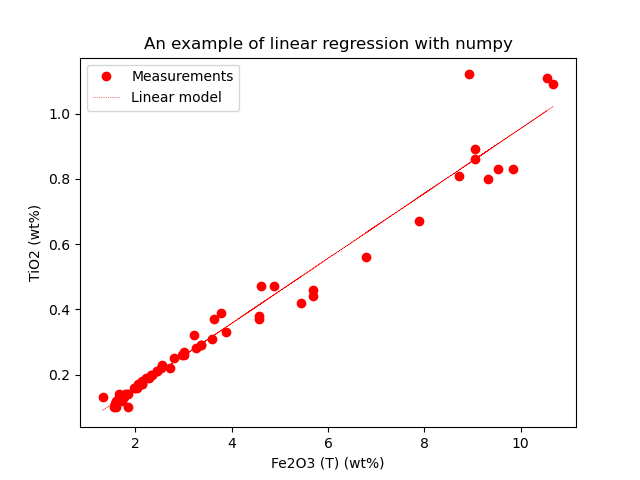

In [14]:
fig, ax = plt.subplots()
ax.plot(geochem['Fe2O3 (T) (wt%)'], geochem['TiO2 (wt%)'],
        'o', color='red', label='Measurements')
ax.plot(geochem['Fe2O3 (T) (wt%)'], Ti_predicted, label='Linear model',
        linestyle='dotted', linewidth=0.5, color='red')
ax.set_xlabel("Fe2O3 (T) (wt%)")
ax.set_ylabel("TiO2 (wt%)")
ax.set_title("An example of linear regression with numpy")
ax.legend()
plt.show()

## More on dates and times and datetimes

In the previous notebook, we made our GeoNet query using `str` objects for the start and end-time arguments, but Python has nice native ways of working with dates and times. These do useful things like cope with leap-years, allow you to add seconds (or other time units) to dates and times, and allow you to format dates and times as `str` objects.

We should switch from giving `str`s to giving `datetime`s.  `datetime` objects come from Python's native [`datetime` library](https://docs.python.org/3/library/datetime.html), and include a handy `.strftime` method which is literally string-format-time.  We will use that to make the correctly formatted string for our query.  The query requires something of the format:

> year-month-dayThour:minute:second

In `datetime` speak the format string for that is:

> `%Y-%m-%dT%H:%M:%S`

- `%Y` is a four-digit year (e.g.: ..., 2018, 2019, 2020, ...)
- `%m` is a two-digit month (e.g.: 01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12)
- `%d` is a two-digit day (zero-padded as months are, e.g.: 01, 02, ... 28, 29, 30, 31)
- `T` is just a letter, anything not preceded by a `%` sign is interpreted as a `str`
- `%H` is a two-digit hour (as above)
- `%M` is a two-digit minute (as above)
- `%S` is a two-digit second (as above).

Other formatters, for things like day of the week, month as a word, julian-day, milliseconds, etc. can be found in the [offical docs](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes).

Lets see how we could format a `datetime`.  To start we need to make a `datetime` object, we can provide arguments of the year, month, day, hour, minute, second, (millisecond) to make one:

In [15]:
# datetime is the module, datetime.datetime is the object itself
test_time = datetime.datetime(2020, 1, 10, 12, 43, 10)
print(test_time)

2020-01-10 12:43:10


Now lets format the string the way that we want it:

In [16]:
print(test_time.strftime("%Y-%m-%dT%H:%M:%S"))

2020-01-10T12:43:10


**Exercise:** Format the `datetime` object as "year/month/day hour:minute:seconds" and then try some other formats using the information listed in the [offical docs](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes).

In [17]:
# Your answer here

Now that we know how it all works, lets put it together into a function with some useful
arguments that we can query.

## Querying a dataframe using a function

We will set some default values for our arguments, so that we do not always have to
specify every argument.  These defaults are given in the function definition as:

```python
def function(argument=value, ...):
    contents_of_function
```
where `argument` is the argument name, and `value` is the default value for that argument:

In [18]:
def get_geonet_quakes(
    min_latitude=-49.0, max_latitude=-40.0,
    min_longitude=164.0, max_longitude=182.0,
    min_magnitude=1, max_magnitude=9.0,
    min_depth=0.0, max_depth=500.0,
    start_time=datetime.datetime(1960, 1, 1),
    end_time=datetime.datetime(2025, 1, 1),
):
    """
    Get a dataframe of the earthquakes in the GeoNet catalogue.

    Parameters
    ----------
    min_latitude
        Minimum latitude in degrees for search
    max_latitude
        Maximum latitude in degrees for search
    min_longitude
        Minimum longitude in degrees for search
    max_longitude
        Maximum longitude in degrees for search
    min_depth
        Minimum depth in km for search
    max_depth
        Maximum depth in km for search
    min_magnitude
        Minimum magnitude for search
    max_magnitude
        Maximum magnitude for search
    start_time
        Start date and time for search
    end_time
        End date and time for search

    Returns
    -------
    pandas.DateFrame of resulting events
    """
    # Convert start_time and end_time to strings
    start_time = start_time.strftime("%Y-%m-%dT%H:%M:%S")
    end_time = end_time.strftime("%Y-%m-%dT%H:%M:%S")
    # Use the more efficient f-string formatting
    query_string = (
        "https://quakesearch.geonet.org.nz/csv?bbox="
        f"{min_longitude},{min_latitude},{max_longitude},"
        f"{max_latitude}&minmag={min_magnitude}"
        f"&maxmag={max_magnitude}&mindepth={min_depth}"
        f"&maxdepth={max_depth}&startdate={start_time}"
        f"&enddate={end_time}")
    print(f"Using query: {query_string}")
    response = requests.get(query_string)
    with open("data/earthquakes.csv", "wb") as f:
        f.write(response.content)
    earthquakes = pd.read_csv(
        "data/earthquakes.csv",
        parse_dates=["origintime", "modificationtime"],
        dtype={"publicid": str})
    # Rename columns as needed
    column_dict = {col: col.strip() for col in earthquakes.columns if col != col.strip()}
    if len(column_dict):
        earthquakes.rename(columns=column_dict, inplace=True)
    return earthquakes

Lets quickly run this function to get the data.  There won't be any output.  Note that I didn't
provide these data in the repository because:
1. I don't have permission to re-distribute the data and,
2. this dataset gets updated frequently!

In [19]:
earthquakes = get_geonet_quakes(
    start_time=datetime.datetime(2015, 1, 1),  # get earthquakes from the start of 2015
    end_time=datetime.datetime(2020, 1, 1), # get earthquakes to the end of 2019
    min_magnitude=3)

print(earthquakes.columns)

Using query: https://quakesearch.geonet.org.nz/csv?bbox=164.0,-49.0,182.0,-40.0&minmag=3&maxmag=9.0&mindepth=0.0&maxdepth=500.0&startdate=2015-01-01T00:00:00&enddate=2020-01-01T00:00:00
Index(['publicid', 'eventtype', 'origintime', 'modificationtime', 'longitude',
       'latitude', 'magnitude', 'depth', 'magnitudetype', 'depthtype',
       'evaluationmethod', 'evaluationstatus', 'evaluationmode', 'earthmodel',
       'usedphasecount', 'usedstationcount', 'magnitudestationcount',
       'minimumdistance', 'azimuthalgap', 'originerror',
       'magnitudeuncertainty'],
      dtype='object')


## Do something useful: applying functions to a dataframe

We saw in the previous notebook how we could sort and slice a dataframe in various ways.Let's look at
an example of doing some actual calculations with a dataframe.  We will use some of what we have
learnt to calculate the occurance rate of earthquakes within a region.  In this case
we will take the region around the top of South Island, containing the faults that ruptured
in the Kaikoura earthquake.

In [20]:
kaikoura = get_geonet_quakes(
    min_latitude=-43.12, max_latitude=-41.15,
    min_longitude=172.37, max_longitude=174.95,
    start_time=datetime.datetime(2010, 1, 1),
    end_time=datetime.datetime(2020, 1, 1),
    min_magnitude=2)
print(f"Downloaded {len(kaikoura)} earthquakes")

Using query: https://quakesearch.geonet.org.nz/csv?bbox=172.37,-43.12,174.95,-41.15&minmag=2&maxmag=9.0&mindepth=0.0&maxdepth=500.0&startdate=2010-01-01T00:00:00&enddate=2020-01-01T00:00:00
Downloaded 30854 earthquakes


Earthquake rate is the number of earthquakes per unit time.  For a dataset like this we can calculate
rate as 1 over the inter-event time.

First we need to sort by origin time:

In [21]:
kaikoura = kaikoura.sort_values(by=["origintime"], ignore_index=True)

Then we need to calculate the time between each successive earthquake.  We can do this by
taking the `origintime` column away from a one-sample shifted version of the `origintime` column,
much like we did for calculating the temperature gradient in the DFDP drillhole. In Pandas we
can do this quickly using the [`.diff`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html) method:

In [22]:
inter_event_time = kaikoura["origintime"].diff()
print(inter_event_time)

0                          NaT
1       0 days 04:49:17.548000
2       0 days 05:37:57.876000
3       0 days 06:41:39.160000
4       0 days 11:29:03.363000
                 ...          
30849   0 days 04:00:38.425000
30850   0 days 03:35:27.277000
30851   0 days 10:19:42.972000
30852   0 days 10:59:17.003000
30853   1 days 00:24:15.080000
Name: origintime, Length: 30854, dtype: timedelta64[ns]


This column is in `timedelta` format. Lets convert it to seconds:

In [23]:
inter_event_time = inter_event_time.dt.total_seconds()
print(inter_event_time)

0              NaN
1        17357.548
2        20277.876
3        24099.160
4        41343.363
           ...    
30849    14438.425
30850    12927.277
30851    37182.972
30852    39557.003
30853    87855.080
Name: origintime, Length: 30854, dtype: float64


The rate is simply 1 / `inter_event_time`:

In [24]:
rate = 1 / inter_event_time

In [25]:
print(rate)

0             NaN
1        0.000058
2        0.000049
3        0.000041
4        0.000024
           ...   
30849    0.000069
30850    0.000077
30851    0.000027
30852    0.000025
30853    0.000011
Name: origintime, Length: 30854, dtype: float64


We can now add this column into the dataframe and call it `"rate"`:

In [26]:
kaikoura['rate'] = rate

We can plot rate as a function of time. Remember that the time values we use here are the
event origin-times, which do not directly represent the time of the rate calculated, which
is an average between events:

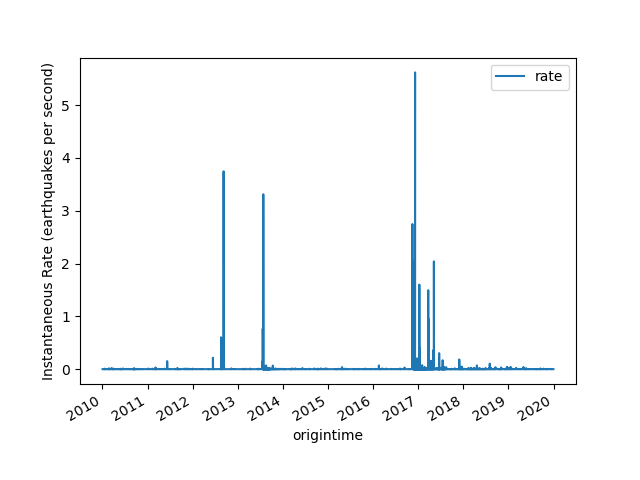

In [27]:
ax = kaikoura.plot(x="origintime", y="rate")
ax.set_ylabel("Instantaneous Rate (earthquakes per second)")
plt.show()

There is lots more that you can do with dataframes.  Pandas is in heavy use in the data science
world, and allows you to quickly explore datasets.  Hopefully you will find it useful at some
point in your Geoscience career.

As a final thing, you can save your dataframes:

In [28]:
kaikoura.to_csv("data/kaikoura.csv", index=False)

## Summary

That covers *some* of the basics of `dataframes` in pandas.  You should be able to use them to replace most of what you would have done with spreadsheets to allow you to work in a more programatic and reproducible way. We also demonstrated some of the basics of fitting simple polynomials to data.  Note that numpy's `polyfit` function isn't limited to 1st order polynomials, the sky is the limit!


## Extension: more sophisticated analysis of a dataframe

### Extension: calculating velocities and strain from GNSS data

You might remember from ESCI203 that we can use GNSS (Global Navigation Satellite System; GPS is one famly of GNSS) to calculate velocities, as well as strain between places. In ESCI203 you calculated this by hand, fitting lines to data, but we can do so much better! In this extension we will:

1. Calculate the average velocities for a few continuous GNSS sites in NZ;
2. Do some sliding-window fun to work out the relative velocity between these sites and how that velocity varies with time.

To start with we need to get some data. We will consider two sites on either side of the Alpine Fault: [HOKI](https://www.geonet.org.nz/data/network/mark/HOKI) and [MTJO](https://www.geonet.org.nz/data/network/mark/MTJO). We can use our helper function from before to get those data:

In [29]:
from helpers.get_data import get_gnss_for_station

starttime, endtime = datetime.datetime(2001, 1, 1), datetime.datetime(2022, 1, 1)

hoki = get_gnss_for_station(
    "HOKI", starttime=starttime, endtime=endtime)
mtjo = get_gnss_for_station(
    "MTJO", starttime=starttime, endtime=endtime)

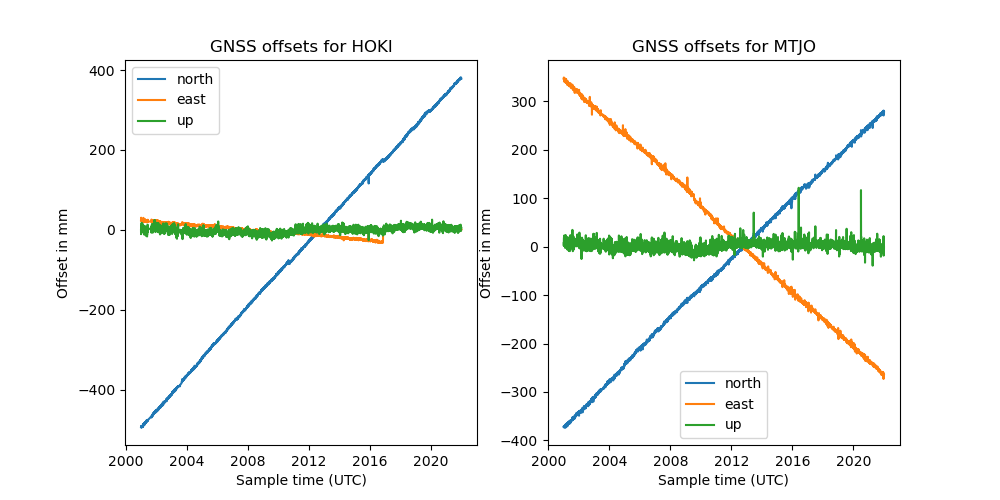

In [30]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5), sharex=True)

for component in ["north", "east", "up"]:
    axes[0].plot(hoki["time"], hoki[component], label=component)
    axes[1].plot(mtjo["time"], mtjo[component], label=component)
for ax, station in zip(axes, ["HOKI", "MTJO"]):
    ax.set_xlabel("Sample time (UTC)")
    ax.set_ylabel("Offset in mm")
    ax.set_title(f"GNSS offsets for {station}")
    ax.legend()
plt.show()

Now that we have those data we need to combine them into a dataframe to use some sliding windows:

In [31]:
hoki_df = pd.DataFrame.from_dict(hoki)
mtjo_df = pd.DataFrame.from_dict(mtjo)

hoki_df.describe()

,time,north,east,up,north_error,east_error,up_error
count,7409,7409.000000,7409.000000,7409.000000,7409.000000,7409.000000,7409.000000
mean,2011-09-09 16:25:04.583614464,-42.781312,-0.835600,-0.290649,2.470767,2.268324,9.580215
min,2001-01-01 11:59:00,-494.190000,-32.580000,-26.440000,1.440000,1.280000,5.010000
25%,2006-07-22 11:59:00,-255.200000,-11.110000,-5.360000,2.160000,1.980000,7.910000
50%,2011-09-16 11:59:00,-41.750000,2.800000,0.040000,2.400000,2.200000,9.280000
75%,2016-10-30 11:59:00,173.230000,9.060000,5.010000,2.700000,2.470000,10.870000
max,2021-12-31 11:59:00,381.260000,30.570000,25.690000,34.080000,51.280000,57.460000
std,NaN,249.192313,13.614058,7.351850,0.584523,0.699293,2.312720


The next notebook covers merging dataframes in more detail, but for now we will just make a merged dataframe based on using the date as the index. Note that the merge below drops values that don't have matching times between the two datasets.

In [32]:
hoki_df = pd.DataFrame.from_dict(hoki)
mtjo_df = pd.DataFrame.from_dict(mtjo)

hoki_df.set_index("time", inplace=True)
mtjo_df.set_index("time", inplace=True)

af_data = pd.merge(
    left=hoki_df, right=mtjo_df, how='inner', 
    left_index=True, right_index=True,
    suffixes=("_hoki", "_mtjo"))

af_data.describe()

,north_hoki,east_hoki,up_hoki,north_error_hoki,east_error_hoki,up_error_hoki,north_mtjo,east_mtjo,up_mtjo,north_error_mtjo,east_error_mtjo,up_error_mtjo
count,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000
mean,-42.297022,-0.856623,-0.289512,2.470447,2.268208,9.581406,-35.951784,34.217105,0.707960,2.235662,2.022786,7.969709
std,249.037656,13.610257,7.346552,0.584766,0.699726,2.313297,185.216696,175.532905,7.945378,0.651721,0.726427,2.297403
min,-494.190000,-32.580000,-26.440000,1.440000,1.280000,5.010000,-373.270000,-273.120000,-39.310000,0.920000,0.920000,3.600000
25%,-254.045000,-11.145000,-5.360000,2.160000,1.980000,7.910000,-192.805000,-118.645000,-4.240000,1.870000,1.690000,6.480000
50%,-41.210000,2.790000,0.040000,2.400000,2.200000,9.280000,-33.890000,28.330000,1.060000,2.180000,1.980000,7.710000
75%,173.387500,9.020000,5.010000,2.700000,2.470000,10.870000,124.690000,189.502500,5.360000,2.550000,2.300000,9.130000
max,381.260000,30.570000,25.690000,34.080000,51.280000,57.460000,280.680000,348.940000,121.340000,27.010000,46.670000,55.530000


### Computing velocity

We know that velocity is just $\frac{distance}{time}$. We can fairly simply work out the daily velocity by calculating the difference between two data points and then dividing by the time between. To exemplify this we are going to focus on the east component of motion and make a simpler dataframe that we can play with:

In [33]:
af_east = pd.merge(
    left=af_data.east_hoki, right=af_data.east_mtjo,
    left_index=True, right_index=True)

print(af_east)

                     east_hoki  east_mtjo
time                                     
2001-01-01 11:59:00      24.31     346.04
2001-01-02 11:59:00      25.72     346.26
2001-01-03 11:59:00      26.42     346.28
2001-01-04 11:59:00      30.57     348.94
2001-01-05 11:59:00      25.39     346.03
...                        ...        ...
2021-12-27 11:59:00      -0.77    -264.72
2021-12-28 11:59:00       1.47    -265.13
2021-12-29 11:59:00      -0.65    -266.14
2021-12-30 11:59:00       0.13    -265.31
2021-12-31 11:59:00       0.86    -264.68

[7398 rows x 2 columns]


In [34]:
af_east = pd.merge(
    left=af_data.east_hoki, right=af_data.east_mtjo,
    left_index=True, right_index=True)

# First work out the sample interval - this isn't always consistent!
delta = (af_east.index[1:] - af_east.index[0:-1]).total_seconds() / (365.25 * 86400)

# Compute velocity
east_hoki_vel = (af_east.east_hoki[1:].to_numpy() - af_east.east_hoki[0:-1].to_numpy()) / delta
east_mtjo_vel = (af_east.east_mtjo[1:].to_numpy() - af_east.east_mtjo[0:-1].to_numpy()) / delta

# Put back into the dataframe
af_east["east_hoki_vel"] = pd.Series(east_hoki_vel, index=af_east.index[1:])
af_east["east_mtjo_vel"] = pd.Series(east_mtjo_vel, index=af_east.index[1:])

print(af_east)

                     east_hoki  east_mtjo  east_hoki_vel  east_mtjo_vel
time                                                                   
2001-01-01 11:59:00      24.31     346.04            NaN            NaN
2001-01-02 11:59:00      25.72     346.26       515.0025        80.3550
2001-01-03 11:59:00      26.42     346.28       255.6750         7.3050
2001-01-04 11:59:00      30.57     348.94      1515.7875       971.5650
2001-01-05 11:59:00      25.39     346.03     -1891.9950     -1062.8775
...                        ...        ...            ...            ...
2021-12-27 11:59:00      -0.77    -264.72      -157.0575        73.0500
2021-12-28 11:59:00       1.47    -265.13       818.1600      -149.7525
2021-12-29 11:59:00      -0.65    -266.14      -774.3300      -368.9025
2021-12-30 11:59:00       0.13    -265.31       284.8950       303.1575
2021-12-31 11:59:00       0.86    -264.68       266.6325       230.1075

[7398 rows x 4 columns]


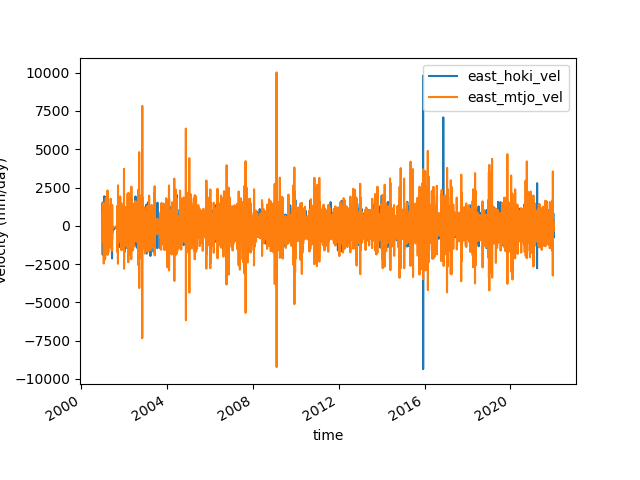

In [35]:
ax = af_east[["east_hoki_vel", "east_mtjo_vel"]].plot()
ax.set_ylabel("Velocity (mm/day)")
plt.show()

<img alt="Pandas .rolling()
          Four images of a panda doing a forward roll" align="right" style="width:30%" src="https://64.media.tumblr.com/tumblr_ma8zvcFa6z1r38hk2o1_500.jpg">

Nice! But it looks really noisy, and it is hard to see what in actually plotted. One thing that we might want to do to reduce the noise in the data is to look at average velocities over some window length. Pandas has a really useful method to do this by creating "rolling windows" using the (you guessed it!) [`.rolling()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html) method.

The rolling method breaks the data down into overlapping chunks of the length specified by the `window` argument (the first argument below). Pandas is also clever enough to take window lengths as time-steps, which is really handy for our irregularly sampled data: instead of having to take n datapoint, which might be a week, or might be a month depending on when the samples come in, we can specify that our window is n days (or seconds, weeks, years...) long. To do that below I have set a window length of 7 days (with the `d` noting that this should be days). 

To ensure that only chunks with the full set of 7 days of samples are included I have set the `min_periods` argument to 7 - you could set this to less if you want to include non-full windows.

I have then applied the [`.median()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html) method to compute the median of each moving window. Finally I changed the `alpha` attribute when plotting to make the lines transparent so that we can see the data overlapping.

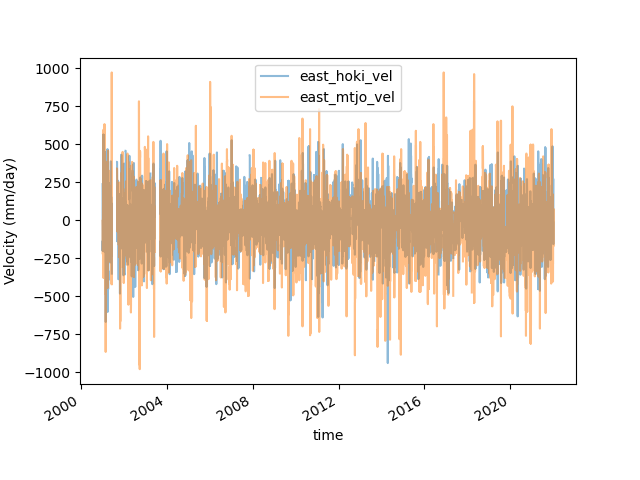

In [36]:
ax = af_east.rolling("7d", min_periods=7).median()[["east_hoki_vel", "east_mtjo_vel"]].plot(alpha=0.5)
ax.set_ylabel("Velocity (mm/day)")
plt.show()

That is all very well, but velocity is a vector (and we have three components of it!) - lets work on getting the relative horizontal velocity between the two sites. We will fix MTJO and work out the velocity of HOKI relative to it. To do that we want to:
1. Subtract the east and north velocities of MTFO from HOKI
2. Do some trigonometry to work out the magnitude and orientation of the vector.

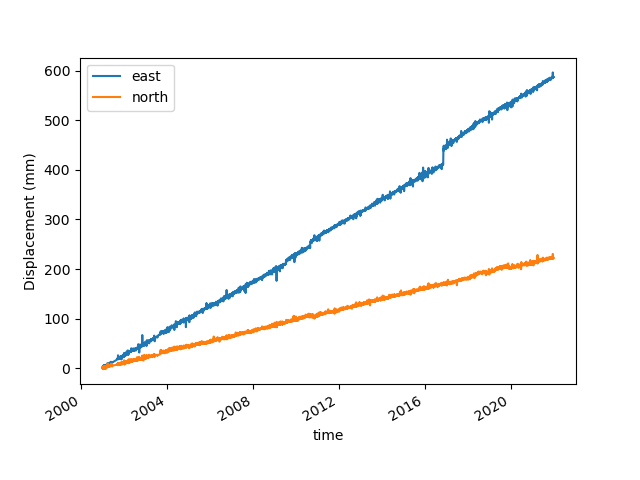

In [37]:
starttime = datetime.datetime(2001, 1, 1)
endtime = datetime.datetime(2022, 1, 1)

hoki = get_gnss_for_station(
    "HOKI", starttime=starttime, endtime=endtime)
mtjo = get_gnss_for_station(
    "MTJO", starttime=starttime, endtime=endtime)

hoki_df = pd.DataFrame.from_dict(hoki)
mtjo_df = pd.DataFrame.from_dict(mtjo)

hoki_df.set_index("time", inplace=True)
mtjo_df.set_index("time", inplace=True)

af_data = pd.merge(
    left=hoki_df, right=mtjo_df, how='inner', 
    left_index=True, right_index=True,
    suffixes=("_hoki", "_mtjo"))

# Subtract east and north velocities of MTJO from HOKI
relative_east = af_data.east_hoki - af_data.east_mtjo
relative_north = af_data.north_hoki - af_data.north_mtjo

# Make a new dataframe that contains our relative horizontal velocities
hoki_mtjo_relative = pd.DataFrame({"east": relative_east, "north": relative_north})

# Because we just care about relative velocities we can set the data to zero at the beginning of observations
hoki_mtjo_relative.east -= hoki_mtjo_relative.east.iloc[0]
hoki_mtjo_relative.north -= hoki_mtjo_relative.north.iloc[0]

ax = hoki_mtjo_relative.plot()
ax.set_ylabel("Displacement (mm)")
plt.show()

*Chocolate Fish for whoever tells me what that eastward step is...*

Now that we have the relative displacements we can work out the magnitude and direction of the relative displacement vector, then divide that magnitude by the sample interval to get the relative velocity magnitude.

To work out the magnitude and bearing of the relative displacement we need to use simple trig. We want to apply that maths to the whole of our dataframe. Pandas has a handy way of doing this using the [`.apply()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply) method. 

We are going to define two simple functions to get the magnitude and bearing of the displacement vector, then use the `.apply()` method on our `DataFrame` to  get this done efficiently. Pandas does fun things to accelerate the `.apply()` method that make it faster than just looping over our data.

In [38]:
from math import atan2, degrees

def displacement_magnitude(row):
    """ Calculate the magnitude of relative displacement. """
    return (row.east ** 2 + row.north ** 2) ** 0.5

def displacement_bearing(row):
    """ Calculate the orientation of relative displacement. """
    return degrees(atan2(row.east, row.north)) % 360

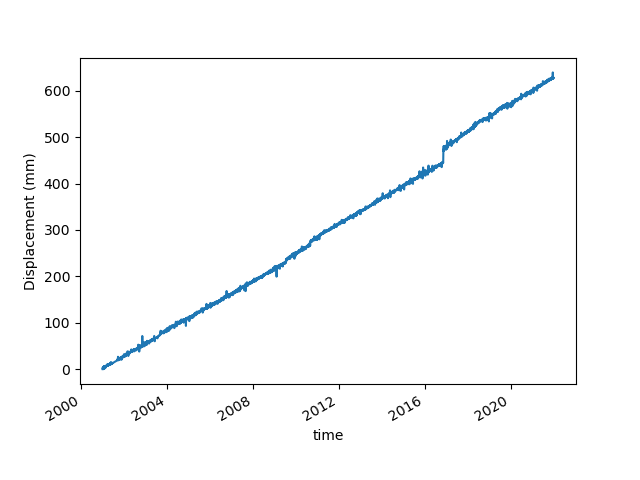

In [39]:
hoki_mtjo_relative["magnitude"] = hoki_mtjo_relative.apply(displacement_magnitude, axis=1)

hoki_mtjo_relative["bearing"] = hoki_mtjo_relative.apply(displacement_bearing, axis=1)

fig, ax = plt.subplots()
ax = hoki_mtjo_relative.magnitude.plot(ax=ax)
ax.set_ylabel('Displacement (mm)')
plt.show()

A fairly nice way to look at angular data is using a [polar](https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_demo.html) plot. We can look at the bearing of the relative displacement over time and have a check to see that it does what we expect - who can remember the sense of motion across the Alpine Fault, and the general orientation of the Alpine Fault?

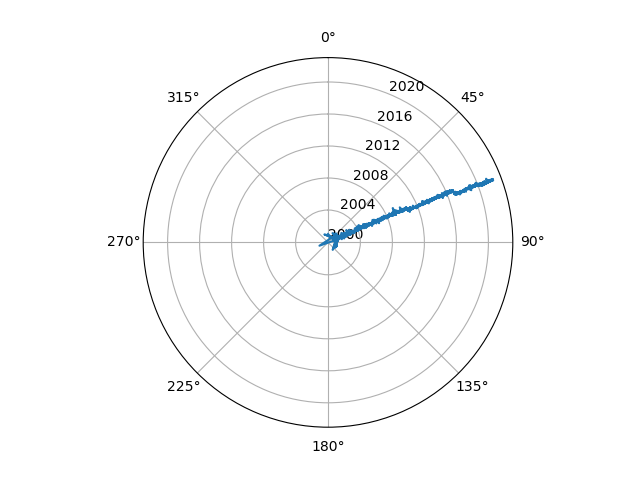

In [40]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(np.radians(hoki_mtjo_relative.bearing), hoki_mtjo_relative.index)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
plt.show()

We can apply all sorts of function through DataFrames using this approach! First though we are going to calculate the relative velocity by simply dividing our relative displacement magnitude by the time interval - note that our data are not regularly sampled, so we can't just divide by 1 day!

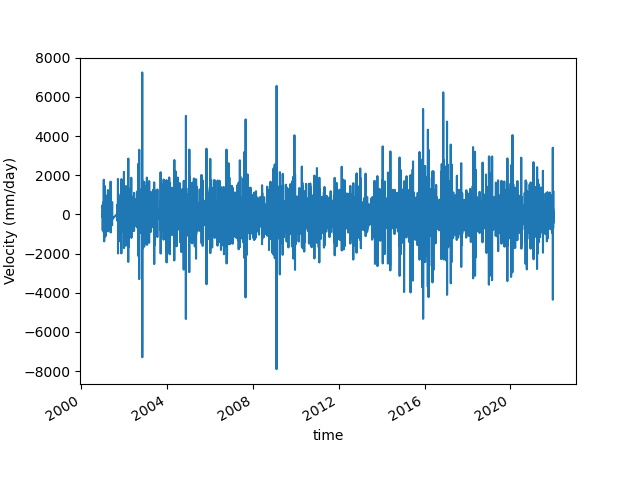

In [41]:
# Calculate time elapsed between samples and convert from seconds to days
delta_time = (hoki_mtjo_relative.index[1:] - hoki_mtjo_relative.index[0:-1]).total_seconds() / (365 * 86400)

delta_displacement = hoki_mtjo_relative.magnitude[1:].to_numpy() - hoki_mtjo_relative.magnitude[0:-1].to_numpy()

hoki_mtjo_relative["velocity"] = pd.Series(
    delta_displacement / delta_time, 
    index=hoki_mtjo_relative.index[1:])

fig, ax = plt.subplots()
ax = hoki_mtjo_relative.velocity.plot(ax=ax)
label = ax.set_ylabel("Velocity (mm/day)")

That is pretty noisy again, lets look at a moving average of that velocity to smooth out the noise. 

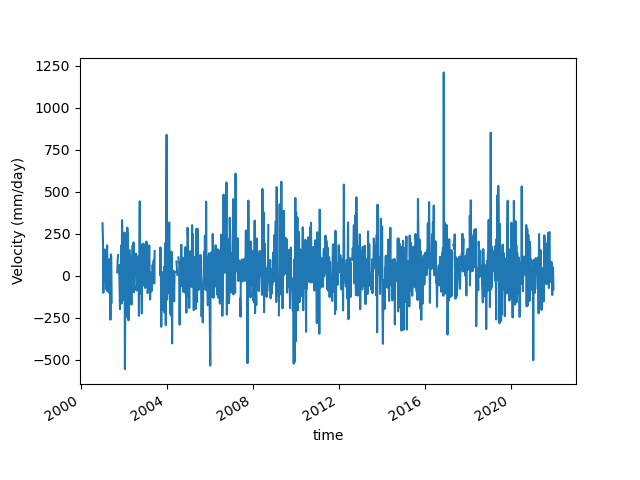

In [42]:
window_size_days = 7

roll_median = hoki_mtjo_relative.velocity.rolling(
    f"{window_size_days}d", min_periods=6).median()

fig, ax = plt.subplots()
ax = roll_median[0::window_size_days].plot(ax=ax)
label = ax.set_ylabel("Velocity (mm/day)")

That looks a little less noisy and we can clearly see the step in velocity after Kaikōura. There also looks like ther might be a seasonal trend to me... Try looking at different moving window sizes to see what you see.


## Exercise:

Now you have a go - select two sites in NZ and compute the relative velocity using the methods shown above. See if you see anything interesting! Hint: you might want to try sites on either side of major faults, or one site close to the east coast of North Island and one in northland to see if you see any SSEs.

In [43]:
# Your work here

## Fin

Nice. If you want another example of applying moving window functions check out Notebook 5. You can also find some Fourier analysis of periodic signals, like the seasonal signals we see in GNSS data!